#Extracting embeddings from all encoder layers of BERT

We learned how to extract the embedding from the pre-trained BERT in the previous section. We learned that they are the embeddings obtained from the final encoder layer. Now the question is should we consider the embedding obtained only from the final encoder layer (final hidden state), or should we also consider the embedding obtained from all the encoder layers (all hidden states)? 

Let's explore more about this.


Let us represent the input embedding layer by $h_{0}$ and the first encoder layer (first hidden layer) by $h_{1}$, second encoder layer (second hidden layer) by $h_{2}$  and so on to the final twelfth encoder layer by $h_{12}$ as shown in the following figure:

Instead of taking the embeddings (representation) only from the final encoder layer, the researchers of the BERT have experimented with taking embeddings from different encoder layers.

For instance, for a named-entity recognition task, the researchers have used the pre-trained BERT for extracting features. Instead of using the embedding only from the final encoder layer (final hidden layer) as a feature, they have experimented using embedding from other encoder layers (other hidden layers) as a feature.

As we can observe from the preceding table, concatenating the embeddings of the last 4 encoder layers (last 4 hidden layers) gives us a greater F1 score of 96.1% in the NER task. Thus, instead of taking the embeddings only from the final encoder layer (final hidden layer), we can also use embeddings from the other encoder layers.

Now, we will learn how to extract the embeddings from all the encoder layers using the transformers library

#Extracting the embeddings

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.1 MB/s eta 0:00:00


In [2]:
from transformers import BertModel, BertTokenizer
import torch

Next, download the pre-trained BERT model and tokenizer. As we can notice while downloading the pre-trained BERT model. 

We need to set `output_hidden_states = True`. By setting this to true helps us to obtain embeddings from all the encoder layers:

In [3]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Preprocess the Input

Let's consider the same sentence we saw in the previous section. First, we tokenize the sentence and add [CLS] token at the beginning and [SEP] token at the end:

In [4]:
sentence = 'I love Paris'
tokens = tokenizer.tokenize(sentence)
tokens = ['[CLS]'] + tokens + ['[SEP]']

Suppose, we need to keep the token length to 7. So, we add the [PAD] tokens and also define the attention mask:

In [5]:
tokens = tokens + ['[PAD]'] + ['[PAD]']
attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]

Next, we convert the tokens to their token_ids:

In [6]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)

Now, we convert the token_ids and attention_mask to tensor:

In [7]:
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)

# Getting the Embedding

Since we set `output_hidden_states = True` while defining the model for getting the embeddings from all the encoder layers, now the model returns an output tuple with three values as shown below:

In [8]:
last_hidden_state, pooler_output, hidden_states = model(token_ids,
                                                        attention_mask = attention_mask)

- The first value `last_hidden_state` contains the representation of all the tokens obtained only from the final encoder layer (encoder 12). - Next, `pooler_output` indicates the representation of the `[CLS]` token from the final encoder layer which is further processed by a linear and tanh activation function. 
- `hidden_states` contains the representation of all the tokens obtained from all the final encoder layers. Now, let us take a look into each of these values and understand them in more detail.

First, let us look at `last_hidden_state`. As we learned, it holds the representation of all the tokens obtained only from the final encoder layer (encoder 12). Let us print the shape of the last_hidden_state:

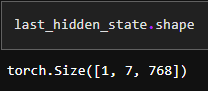

In [11]:
len(last_hidden_state)

17

The size [1,7,768] indicates the [batch_size, sequence_length, hidden_size].

Our batch size is 1, the sequence length is the token length and since we have 7 tokens the sequence length is 7, and the hidden size is the representation (embedding) size and it is 768 for the BERT-base model.

We can obtain the embedding of each token as:

- last_hidden[0][0] gives the representation of the first token which is [CLS]
- last_hidden[0][1] gives the representation of the second token which is 'I'
- last_hidden[0][2] gives the representation of the third token which is 'love'
Similarly, we can obtain the representation of all the tokens from the final encoder layer.

Next, we have `pooler_output` which contains the representation of the [CLS] token from the final encoder layer which is further processed by a linear and tanh activation function. Let us print the shape of the `pooler_output`:

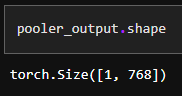

The size [1,768] indicates the [batch_size, hidden_size].

We learned that `[CLS]` token holds the aggregate representation of the sentence. Thus, we can use the `pooler_output` as the representation of the given sentence 'I love Paris'.

Finally, we have `hidden_states` and it contains the representation of all the tokens obtained from all the final encoder layers. It is a tuple containing 13 values holding the representation of all encoder layers (hidden layers) starting from the input embedding layer to the final encoder layer .

In [13]:
len(hidden_states)

13

As we can notice, it contains 13 values holding the representation of all layers. Thus:

- hidden_states[0] contains the representation of all the tokens obtained from the input embedding layer
- hidden_states[1] contains the representation of all the tokens obtained from the first encoder layer
- hidden_states[2] contains the representation of all the tokens obtained from the second encoder layer

Similarly, hidden_states[12] contains the representation of all the tokens obtained from the final encoder layer Let's explore this more. First, let's print the shape of the hidden_states[0] which contains the representation of all the tokens obtained from the input embedding layer :

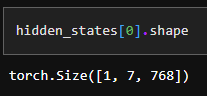

Sources : https://github.com/PacktPublishing/Getting-Started-with-Google-BERT